In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

In [ ]:
#load dataset

mnist = tf.keras.datasets.mnist
cifar10 = tf.keras.datasets.cifar10

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()


In [ ]:
# normalize pixel values to be between 0 and 1
x_train_mnist, x_test_mnist = x_train_mnist / 255, x_test_mnist / 255
x_train_cifar10, x_test_cifar10 = x_train_cifar10 / 255, x_test_cifar10 / 255

In [ ]:
mnist_input_shape = (28, 28, 1)
cifar_input_shape = (32, 32, 3)

In [ ]:
# function to create and compile CNN model
def create_cnn(activation_function, input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape= input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
#  training on mnist data for different node functions

history_dict_mnist = {}

for activation_function in activation_functions:
    model_mnist = create_cnn(activation_function, mnist_input_shape)
    print("Trainng for " + activation_function + " on mnist dataset")
    history_mnist = model_mnist.fit(x_train_mnist.reshape(-1, 28, 28, 1), y_train_mnist, epochs=10,
                              validation_data=(x_test_mnist.reshape(-1, 28, 28, 1), y_test_mnist))
    history_dict_mnist[activation_function] = history_mnist

Trainng for sigmoid on mnist dataset
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6066 - accuracy: 0.8014 - val_loss: 0.1140 - val_accuracy: 0.9667
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0945 - accuracy: 0.9725 - val_loss: 0.0632 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0578 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0494 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0430 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.

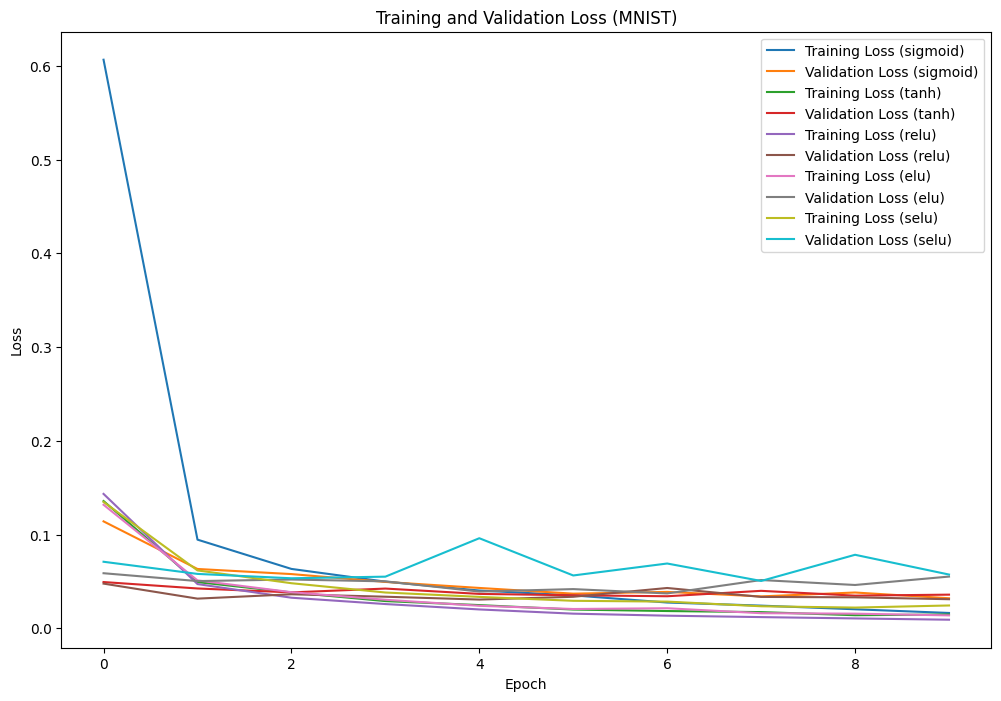

In [ ]:
# Plot training loss and validation loss for minst
plt.figure(figsize=(12, 8))
for activation_function, history_mnist in history_dict_mnist.items():
    plt.plot(history_mnist.history['loss'], label=f'Training Loss ({activation_function})')
    plt.plot(history_mnist.history['val_loss'], label=f'Validation Loss ({activation_function})')

plt.title('Training and Validation Loss (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

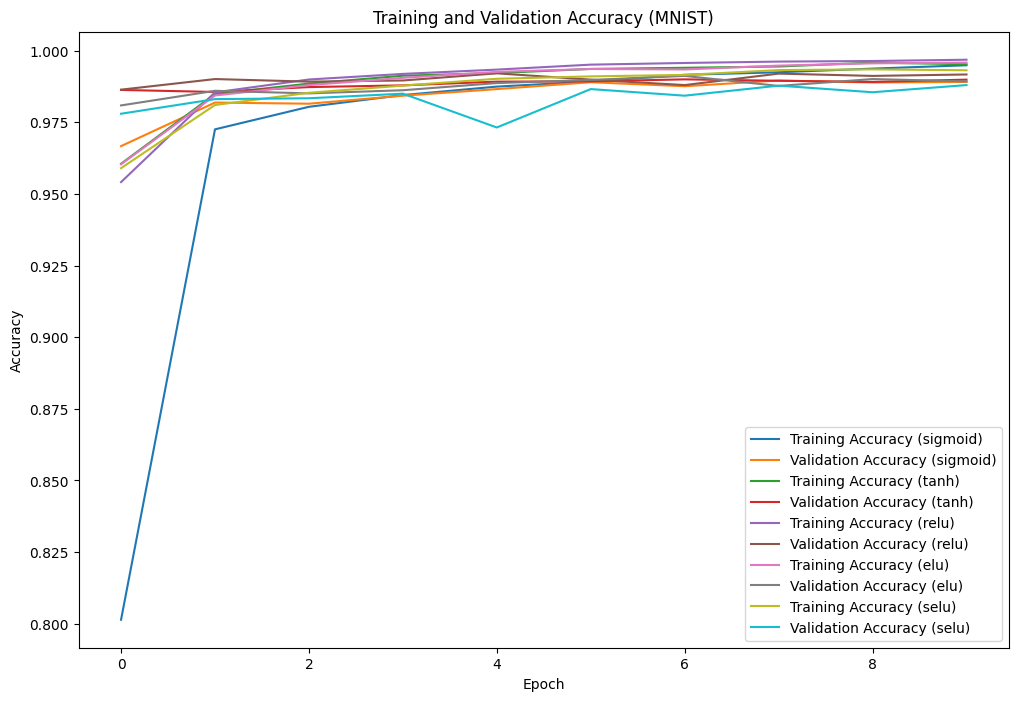

In [ ]:
# Plot training accuracy and validation accuracy for mnist
plt.figure(figsize=(12, 8))
for activation_function, history_mnist in history_dict_mnist.items():
    plt.plot(history_mnist.history['accuracy'], label=f'Training Accuracy ({activation_function})')
    plt.plot(history_mnist.history['val_accuracy'], label=f'Validation Accuracy ({activation_function})')

plt.title('Training and Validation Accuracy (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training for CIFAR-10

In [ ]:
# Training on CIFAR-10 dataset with different activation functions
history_dict_cifar10 = {}

for activation_function in activation_functions:
    model_cifar10 = create_cnn(activation_function, cifar_input_shape)
    print("Trainng for " + activation_function + " on cifar-10 dataset")
    history_cifar = model_cifar10.fit(x_train_cifar10, y_train_cifar10, epochs=10,
                                validation_data=(x_test_cifar10, y_test_cifar10))
    history_dict_cifar10[activation_function] = history_cifar



Trainng for sigmoid on cifar-10 dataset
Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 2.1718 - accuracy: 0.1736 - val_loss: 1.8821 - val_accuracy: 0.3152
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7113 - accuracy: 0.3856 - val_loss: 1.5896 - val_accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5372 - accuracy: 0.4482 - val_loss: 1.4921 - val_accuracy: 0.4580
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4502 - accuracy: 0.4800 - val_loss: 1.4209 - val_accuracy: 0.4902
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3809 - accuracy: 0.5048 - val_loss: 1.3681 - val_accuracy: 0.5097
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3247 - accuracy: 0.5253 - val_loss: 1.3236 - val_accuracy: 0.5308
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2755 - accuracy: 

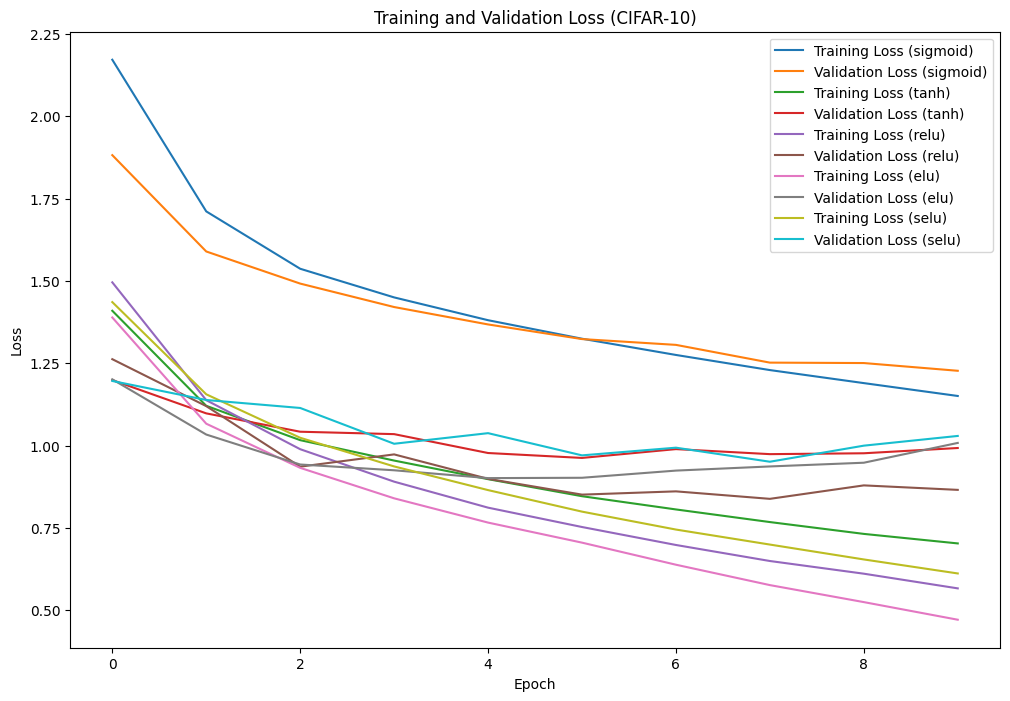

In [ ]:
# Plot training loss and validation loss for CIFAR-10
plt.figure(figsize=(12, 8))
for activation_function, history_cifar in history_dict_cifar10.items():
    plt.plot(history_cifar.history['loss'], label=f'Training Loss ({activation_function})')
    plt.plot(history_cifar.history['val_loss'], label=f'Validation Loss ({activation_function})')

plt.title('Training and Validation Loss (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



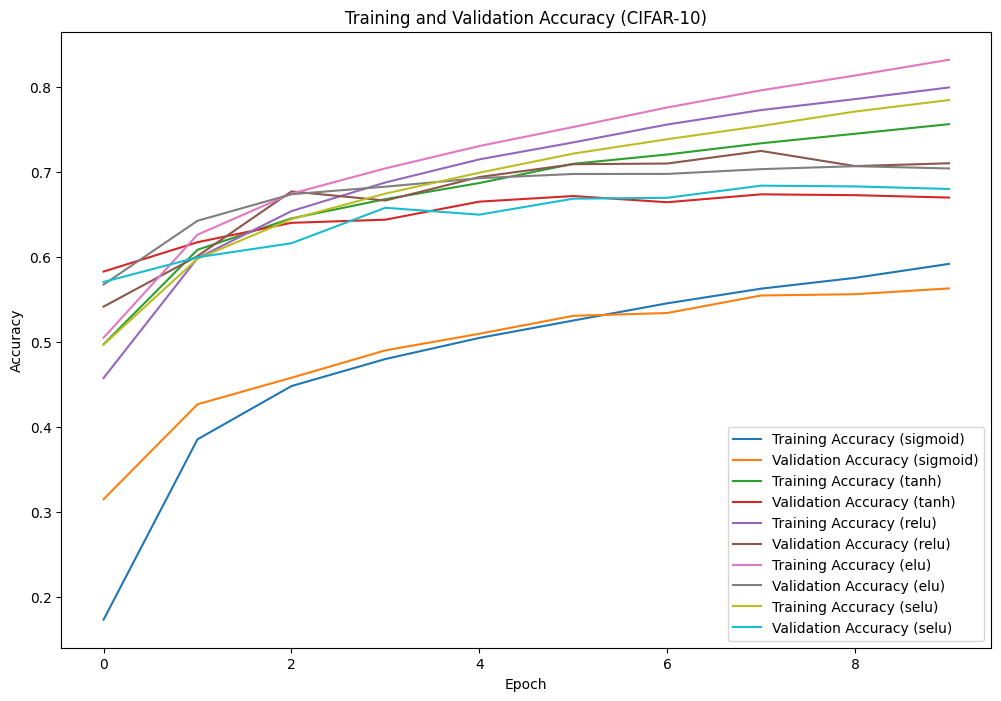

In [ ]:
# Plot training accuracy and validation accuracy for CIFAR-10
plt.figure(figsize=(12, 8))
for activation_function, history_cifar in history_dict_cifar10.items():
    plt.plot(history_cifar.history['accuracy'], label=f'Training Accuracy ({activation_function})')
    plt.plot(history_cifar.history['val_accuracy'], label=f'Validation Accuracy ({activation_function})')

plt.title('Training and Validation Accuracy (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the graphs above above ReLU performs better on MNIST and ELU works best for CIFAR-10  